# Proyecto 1 - Primera etapa

Estudiantes:
1.   Laura Valentina Cerón - 202214973
2.   Maria Paula Estupiñan - 202212331

#  Sección 2 - Entendimiento y preparación de los datos

# Importación de librerias

In [51]:
!pip install contractions
import contractions

In [52]:
!pip install ydata-profiling

In [53]:
!pip install chardet

In [54]:
!pip install nltk

In [55]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [56]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

import scipy.stats as stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from ydata_profiling import ProfileReport

import re, string, unicodedata
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import *
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import chardet


# Carga de datos

En este fragmento de código se cargan dos archivos desde el computador a Google Colab utilizando files.upload(). Como los archivos originales están en formato Excel (.xlsx), se leen con pd.read_excel() y se convierten en DataFrames de pandas. A continuación, según el nombre del archivo, si contiene la palabra “prueba” se guarda como CSV en la ruta fija test_path, y si no, se guarda en la ruta train_path. Ambos CSV se exportan con codificación UTF-8 con BOM (utf-8-sig) para asegurar que caracteres especiales como tildes o eñes se interpreten correctamente. Finalmente, los dos archivos CSV generados se vuelven a cargar con pd.read_csv(), de modo que ya se puede trabajar con train_df y test_df en un formato de texto plano, más ligero y compatible.

In [57]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
train_path = "./datos_entrenamiento_proyecto1(train_data).csv"
test_path  = "./datos_prueba_proyecto1(test_data).csv"

for fname in uploaded.keys():
    df = pd.read_excel(fname, sheet_name=0, engine="openpyxl")

    if "prueba" in fname.lower():
        df.to_csv(test_path, index=False, encoding="utf-8-sig")
    else:
        df.to_csv(train_path, index=False, encoding="utf-8-sig")

train_df = pd.read_csv(train_path, encoding="utf-8-sig")
test_df  = pd.read_csv(test_path,  encoding="utf-8-sig")

Saving Datos_proyecto.xlsx to Datos_proyecto (2).xlsx


In [58]:
print("DATOS PRUEBA:")
print("Shape:", train_df.shape)
display(train_df.head(5))

print(" ")
print("DATOS")
print("Shape:", test_df.shape)
display(test_df.head(5))

DATOS PRUEBA:
Shape: (2424, 2)


textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

 
DATOS
Shape: (152, 1)


Textos_espanol
0  El rector, que es el representante local del M...
1  Tenga en cuenta que todos los programas antipo...
2  Debido a que son en gran medida invisibles, es...
3  Los recursos aún son limitados en este sector....
4  Durante el período 1985-2008, la educación pri...

Dado que hemos cargado y convertido nuestros datos correctamente, el siguiente paso consiste en generar una copia del DataFrame original. Esta copia se almacenará en una nueva variable, lo que nos permitirá realizar transformaciones, limpiezas o ajustes sin alterar la versión inicial de los datos. De esta manera garantizamos que siempre contemos con un respaldo intacto al cual recurrir en caso de ser necesario.

In [59]:
train_copy = train_df.copy()
test_copy  = test_df.copy()

In [60]:
print("DATOS PRUEBA:")
print("Shape:", train_copy.shape)
display(train_df.head(5))

print(" ")
print("DATOS")
print("Shape:", test_copy.shape)
display(test_df.head(5))

DATOS PRUEBA:
Shape: (2424, 2)


textos  labels
0  "Aprendizaje" y "educación" se consideran sinó...       4
1  Para los niños más pequeños (bebés y niños peq...       4
2  Además, la formación de especialistas en medic...       3
3  En los países de la OCDE se tiende a pasar de ...       4
4  Este grupo se centró en las personas que padec...       3

 
DATOS
Shape: (152, 1)


Textos_espanol
0  El rector, que es el representante local del M...
1  Tenga en cuenta que todos los programas antipo...
2  Debido a que son en gran medida invisibles, es...
3  Los recursos aún son limitados en este sector....
4  Durante el período 1985-2008, la educación pri...

# Entendimiento de los datos

## Descripcion de variables

En esta etapa vamos a hacer un reconocimiento de todos las variables que tienen los datos, posteriormente, en cada iteración está el análisis de datos y la elección de variables para entrenar el modelo.

- **Texto_espanol:** Es una variable de texto (object) que contiene las opiniones en idioma español expresadas por los habitantes locales. Su función principal es reflejar percepciones, preocupaciones y propuestas ciudadanas frente a diferentes aspectos de su vida cotidiana.

- **sdg:** Es una variable categórica de tipo numérico que representa la etiqueta objetivo del modelo. Cada valor corresponde a un Objetivo de Desarrollo Sostenible (ODS) específico, en línea con el propósito del proyecto de vincular opiniones ciudadanas con los ODS. Los valores que puede tomar son:

*   1: Fin de la pobreza
*   3: Salud y bienestar
*   4: Educación de calidad

## Profile Report

En esta sección, procederemos a analizar los datos utilizando la librería Pandas Profiling, específicamente mediante la función ProfileReport. Esta herramienta nos proporcionará una visión más detallada y profunda de los datos que vamos a examinar, permitiéndonos identificar patrones, distribuciones, y posibles anomalías dentro del conjunto de datos. Este análisis exploratorio será fundamental para orientar nuestras decisiones en las etapas posteriores del proyecto.

Realizaremos el análisis sobre datos_entrenamiento_proyecto1

In [61]:
ProfileReport(train_copy)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

En el reporte generado por la función ProfileReport, se identifican varias fases clave del análisis.En la primera fase, revisamos y evaluamos la estructura del dataframe, confirmando que contamos con un total de 2,424 registros. Además, se verifica que no existen filas incompletas ni columnas con datos vacíos, lo cual es un aspecto positivo.

También se llevó a cabo un análisis detallado de las diferentes variables presentes en el conjunto de datos. Observamos que la columna textos contiene valores únicos en su totalidad (100% distintos), sin datos duplicados ni faltantes. Esto es esperable, dado que cada registro corresponde a una opinión ciudadana diferente, lo que aporta diversidad semántica al dataset.

Adicionalmente, examinamos la variable labels, que constituye la variable objetivo de nuestro modelo. Esta columna puede tomar tres valores distintos que corresponden a los Objetivos de Desarrollo Sostenible: la clase 4 (Educación de calidad), con 1,025 registros, la clase 3 (Salud y bienestar), con 894 registros, y la clase 1 (Fin de la pobreza), con 505 registros.

In [62]:
conteo = train_copy['labels'].value_counts()
proporcion = (train_copy['labels'].value_counts(normalize=True) * 100).round(2)

resumen = pd.DataFrame({
    'labels': conteo.index,
    'Cantidad': conteo.values,
    'Proporción (%)': proporcion.values
})

print(resumen.to_string(index=False))

 labels  Cantidad  Proporción (%)
      4      1025           42.29
      3       894           36.88
      1       505           20.83


#Wordcloud

En esta sección se presentarán una serie de gráficos que representan las diferentes clases incluidas en nuestro dataframe. En particular, se generará un WordCloud para cada clase, con el propósito de visualizar las palabras más frecuentes en cada categoría y resaltar aquellos términos que resultan distintivos.

El análisis de estas palabras resulta especialmente relevante, ya que permite obtener una comprensión más profunda de los conceptos que predominan en cada clase. Esta información será clave tanto para el desarrollo del modelo, al orientar la selección de características significativas, como para la interpretación de sus resultados, facilitando la explicación de cómo se relacionan los textos con las categorías establecidas.

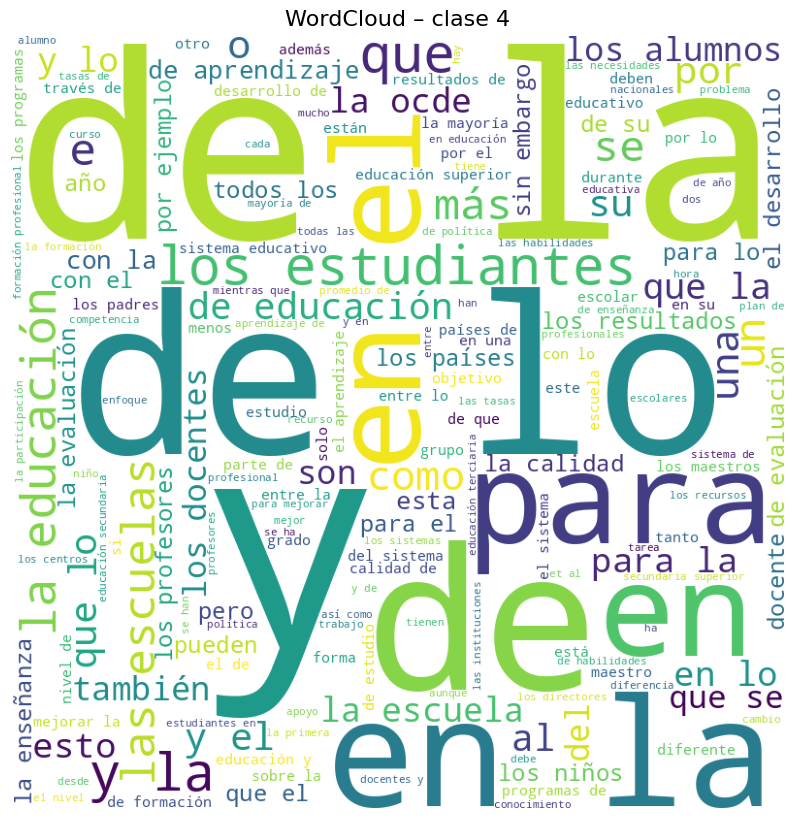

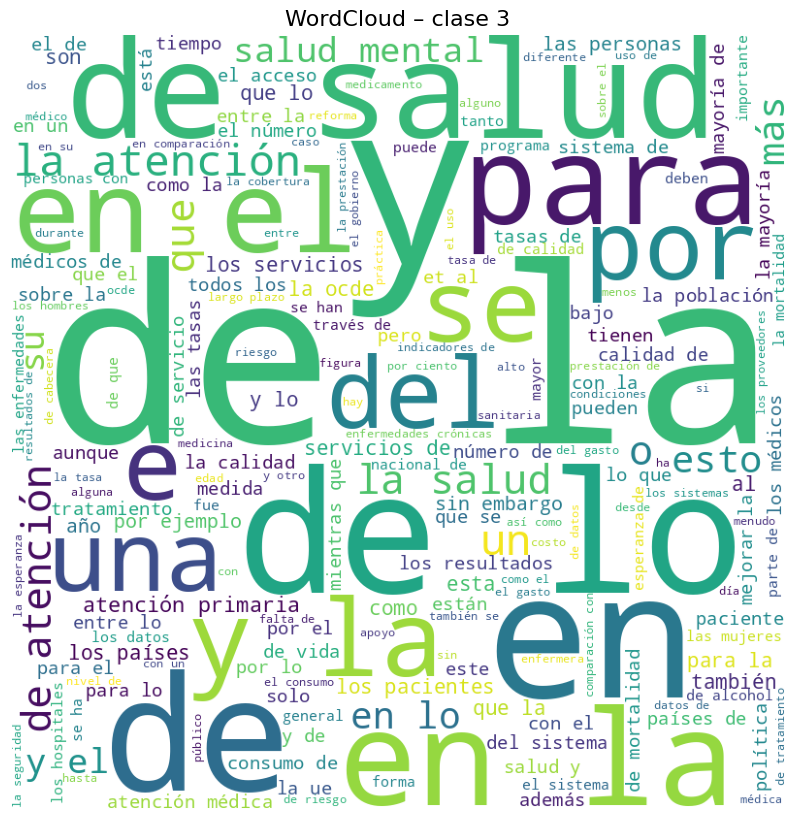

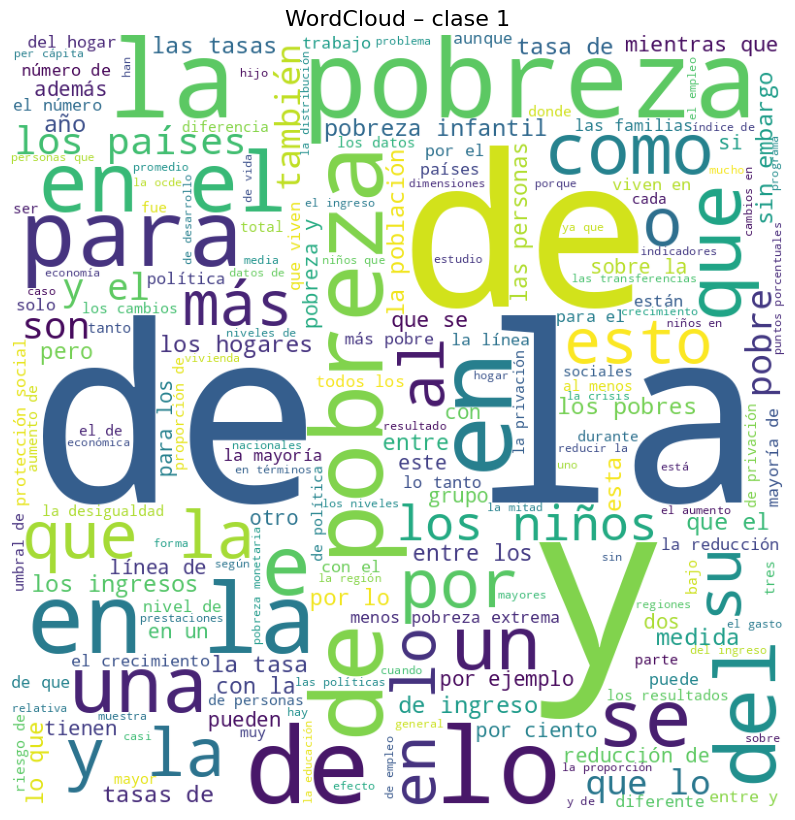

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def mostrar_wordcloud_por_clase_train(df=train_copy, columna_texto="textos", columna_label="labels"):

    clases = df[columna_label].unique()

    for clase in clases:
        textos_clase = df[df[columna_label] == clase][columna_texto].astype(str)
        corpus = " ".join(t.lower() for t in textos_clase)
        wc = WordCloud(
            width=800, height=800,
            background_color="white",
            min_font_size=10
        ).generate(corpus)

        plt.figure(figsize=(8, 8))
        plt.imshow(wc)
        plt.axis("off")
        plt.title(f"WordCloud – clase {clase}", fontsize=16)
        print(" ")
        print(" ")
        plt.tight_layout(pad=0)
        plt.show()

mostrar_wordcloud_por_clase_train()

Como se aprecia en las gráficas anteriores, se observa una alta frecuencia de palabras funcionales, como conjunciones y preposiciones, que tienden a repetirse de manera constante. Aunque aparecen con gran frecuencia, este tipo de términos no aportan valor significativo para la tarea de clasificación, ya que no permiten distinguir con precisión entre las diferentes clases de nuestro modelo.

Para enfrentar este problema, procederemos a realizar una depuración del texto mediante la eliminación de stopwords. Estas corresponden a palabras comunes en el idioma que, por su naturaleza, suelen tener un peso reducido en el análisis semántico y pueden ocultar la relevancia de los términos verdaderamente representativos. Al aplicar este filtrado, podremos centrar el análisis en aquellas palabras clave que son realmente útiles para identificar patrones y diferenciar entre categorías.

Este proceso de limpieza y refinamiento resulta fundamental, ya que mejora la calidad y, en consecuencia, contribuye a optimizar tanto el rendimiento como la precisión de los modelos de clasificación basados en lenguaje natural.

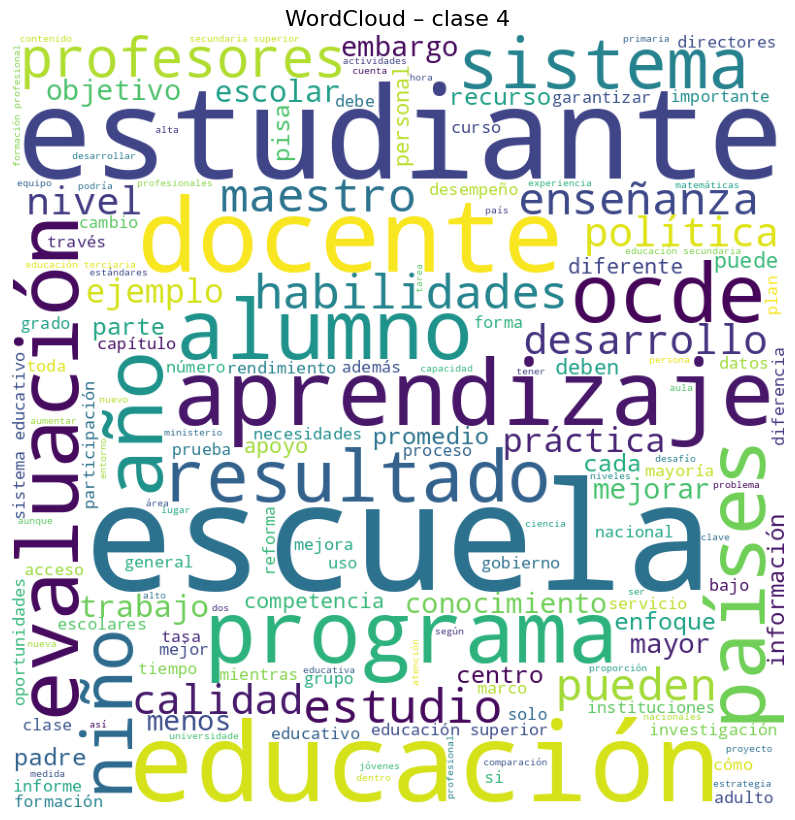

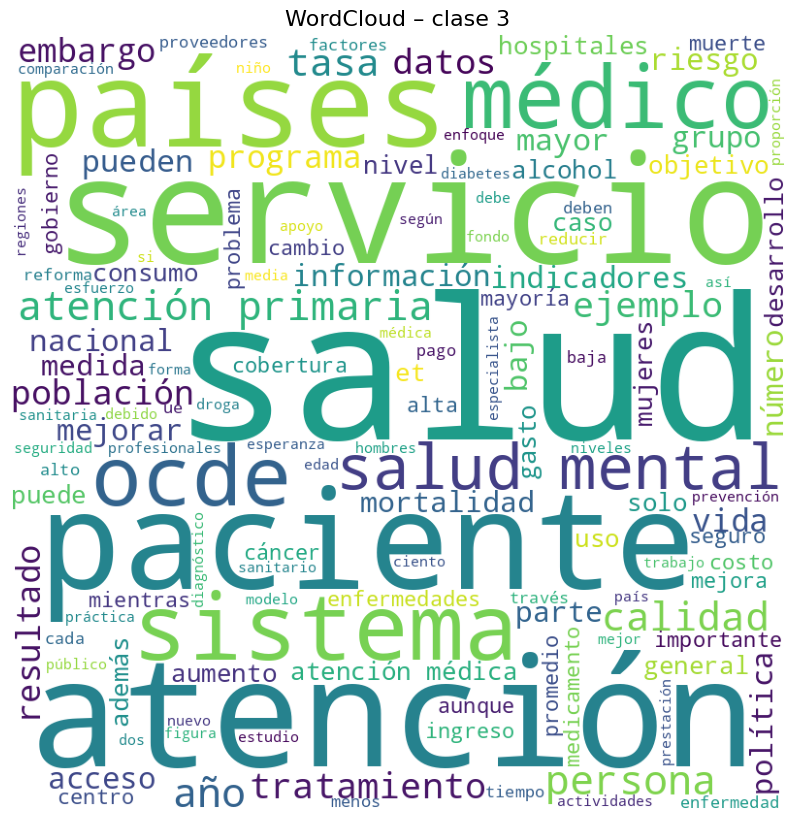

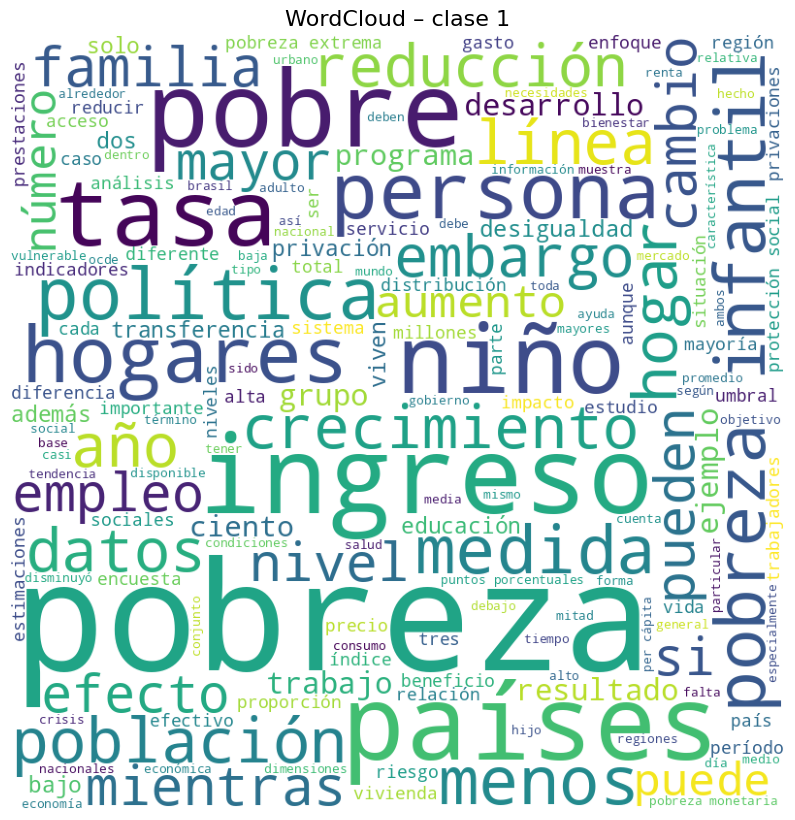

In [64]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stop_words = stopwords.words('spanish')

for clase in train_copy['labels'].unique():

    textos_clase = train_copy.loc[train_copy['labels'] == clase, 'textos'].astype(str)
    corpus = " ".join(t.lower() for t in textos_clase)

    wc = WordCloud(
        width=800, height=800,
        background_color="white",
        stopwords=stop_words,
        min_font_size=10
    ).generate(corpus)

    plt.figure(figsize=(8, 8))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud – clase {clase}", fontsize=16)
    print(" ")
    print(" ")
    plt.tight_layout(pad=0)
    plt.show()

En este análisis, hemos identificado las palabras clave asociadas a cada una de las tres clases presentes en nuestro conjunto de datos. Estas palabras clave juegan un papel crucial en la diferenciación de las clases y permitirán que nuestro modelo las analice con mayor precisión, facilitando la generación de predicciones más exactas para nuevos datos que puedan ser introducidos.


A continuación, se presentan las palabras específicas que se han identificado como significativas para cada clase:


* Clase 4: estudiante, escuela, docente, educación, aprendizaje, programa, evaluación, alumno.
* Clase 3: salud, paciente, atención, servicio, médico, países, sistema.
* Clase 1: pobreza, ingreso, niño, países, persona, hogares, política, familia, población, medida, tasa, reducción.

# Preparación de los datos

##Unicidad y completitud

En cuanto a la evaluación de la unicidad y la completitud de los datos, no fue necesario realizar procesos adicionales de limpieza o imputación. El análisis previo confirmó que todas las observaciones presentes en el dataset son únicas, sin registros duplicados, y que no existen valores faltantes en las variables incluidas. Esto asegura que cada registro corresponde a una opinión distinta y válida, por tanto, el dataset se encuentra en condiciones óptimas en estos aspectos para avanzar hacia las siguientes etapas del preprocesamiento y modelado.

## Consistencia

En cuanto al principio de consistencia, se revisaron los tipos de datos de las columnas del dataset. Se confirmó que la variable textos se encuentra almacenada como tipo object, lo cual es coherente con su naturaleza de contener información en lenguaje natural. Por otro lado, la variable labels se encuentra correctamente representada como un valor numérico, restringido a las clases 1, 3 y 4, que corresponden a los Objetivos de Desarrollo Sostenible definidos en el proyecto.

El análisis detallado fila por fila permitió verificar que todas las observaciones cumplen con el formato esperado, sin registros que presenten inconsistencias en su tipado o valores fuera del rango definido. Esto confirma que ambas variables mantienen la consistencia requerida y que el dataset se encuentra en condiciones óptimas para su uso en las siguientes etapas de análisis y modelado.

In [65]:
import pandas as pd

def resumen_consistencia(train_copy):
    total = len(train_copy)

    is_str = train_copy['textos'].apply(lambda x: isinstance(x, str))
    n_str  = int(is_str.sum())
    n_not  = int(total - n_str)

    labels_num = pd.to_numeric(train_copy['labels'], errors='coerce')
    valid_mask = labels_num.isin([1, 3, 4])

    valid_counts = labels_num[valid_mask].value_counts().reindex([1, 3, 4], fill_value=0)

    invalid_count      = int((~valid_mask).sum())
    non_numeric_count  = int(labels_num.isna().sum())

    resumen = pd.DataFrame({
        "Métrica": [
            "textos tipo str", "textos no str",
            "labels = 1", "labels = 3", "labels = 4",
            "labels inválidos (≠ 1,3,4)", "labels no numéricos"
        ],
        "Cantidad": [
            n_str, n_not,
            int(valid_counts.get(1, 0)),
            int(valid_counts.get(3, 0)),
            int(valid_counts.get(4, 0)),
            invalid_count, non_numeric_count
        ]
    })
    resumen["Proporción (%)"] = (resumen["Cantidad"] / total * 100).round(2)

    print(f"Total de filas: {total}")
    print("")
    display(resumen.style.hide(axis="index"))

    bad_rows = train_copy.loc[(~is_str) | (~valid_mask), ["textos", "labels"]].head(10)
    if len(bad_rows):
        print("\nEjemplos de filas con problemas (máx. 10):")
        display(bad_rows)
    else:
        print("\nTodas las filas cumplen con los tipos/valores esperados!")

resumen_consistencia(train_copy)

Total de filas: 2424




Todas las filas cumplen con los tipos/valores esperados!


##Validez

En la revisión de validez de los datos, se constató que la única variable numérica presente en el dataset corresponde a labels, la cual funciona como variable objetivo del modelo. Esta columna contiene exclusivamente los valores 1, 3 y 4, que se encuentran dentro del rango esperado y corresponden de manera precisa a las categorías definidas en el proyecto.

Dado que no se identificaron valores fuera de rango ni inconsistencias lógicas en esta variable, se concluye que la información cumple plenamente con los criterios de validez establecidos. En consecuencia, el dataset no requiere ajustes adicionales en este aspecto.

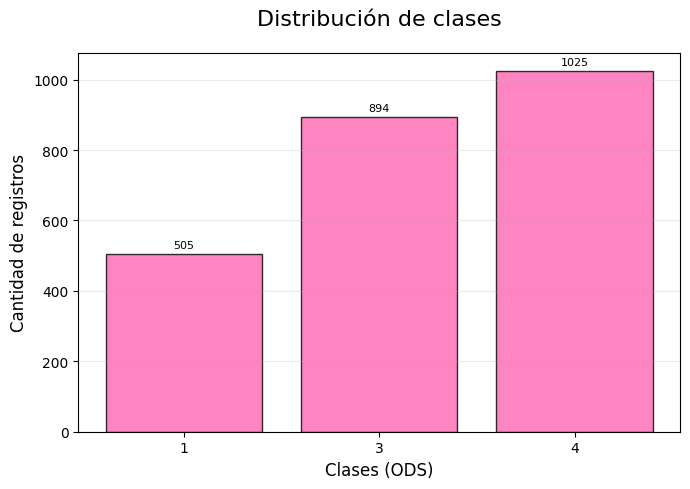

In [66]:
import matplotlib.pyplot as plt

conteo = train_copy['labels'].value_counts().sort_index()

plt.figure(figsize=(7,5))
bars = plt.bar(conteo.index.astype(str), conteo.values, color="#ff66b3", edgecolor="black", alpha=0.8)

plt.title("Distribución de clases", fontsize=16, pad=20)
plt.xlabel("Clases (ODS)", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval),
             ha='center', va='bottom', fontsize=8)

plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()

## Analizar

Después de verificar estos 4 principio en los datos, el siguiente paso consiste en preparar la variable textos, que es de tipo texto y constituye la información central sobre la cual se entrenará el modelo. Dado que los algoritmos de aprendizaje automático no trabajan directamente con texto en su forma bruta, es necesario aplicar un proceso de preparación y transformación del lenguaje natural que permita representar adecuadamente la información y mejorar la capacidad predictiva del modelo.

Para este caso, se ha definido un flujo de preprocesamiento dividido en tres etapas principales:

* 1. Eliminacion de Ruido
* 2. Tokenizacion
* 3. Normalizacion

###Eliminación de ruido

En esta primera etapa, nos enfocamos en limpiar los datos eliminando elementos que no aportan valor al análisis, como símbolos, puntuaciones innecesarias, números, y caracteres especiales. También eliminaremos stopwords, que son palabras comunes como preposiciones o conjunciones que no contribuyen significativamente a la clasificación del texto.

In [67]:
nltk.download('stopwords')
p = inflect.engine()

def preprocessing_text(text):

    s = str(text).lower()
    s = " ".join([p.number_to_words(word) if word.isdigit() else word for word in s.split()])
    s = re.sub(r'[^\w\s]', ' ', s)
    s = unicodedata.normalize('NFKD', s).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    stopwords_es = set(stopwords.words('spanish'))
    s = " ".join([w for w in s.split() if w not in stopwords_es])
    s = re.sub(r'\s+', ' ', s).strip()
    return s

train_copy['textos'] = train_copy['textos'].apply(preprocessing_text)
train_copy.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


textos  labels
0  aprendizaje educacion consideran sinonimos esc...       4
1  ninos mas pequenos bebes ninos pequenos capaci...       4
2  ademas formacion especialistas medicina genera...       3
3  paises ocde tiende pasar cursos obligatorios o...       4
4  grupo centro personas padecen trastornos menta...       3

### Tokenización

La segunda etapa del análisis corresponde a la tokenización, proceso mediante el cual cada texto se divide en unidades mínimas llamadas tokens (generalmente palabras). De esta forma, frases y párrafos se transforman en secuencias de palabras individuales que el modelo puede procesar de manera independiente.

Este paso es esencial porque convierte el texto en estructuras manejables, permitiendo que el modelo identifique patrones y relaciones entre palabras con mayor precisión. Además, tras la tokenización se aplica el preprocesamiento, que incluye la limpieza y normalización de los tokens (eliminación de ruido, caracteres irrelevantes y estandarización del formato). Con ello se conservan únicamente las palabras clave útiles para el análisis, lo que mejora la comprensión del texto y contribuye a obtener predicciones más precisas y confiables.

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
train_copy['textos'] = train_copy['textos'].apply(lambda x: word_tokenize(str(x)))
train_copy.head()

textos  labels
0  [aprendizaje, educacion, consideran, sinonimos...       4
1  [ninos, mas, pequenos, bebes, ninos, pequenos,...       4
2  [ademas, formacion, especialistas, medicina, g...       3
3  [paises, ocde, tiende, pasar, cursos, obligato...       4
4  [grupo, centro, personas, padecen, trastornos,...       3

###Normalización

En esta última etapa se realiza la normalización del texto, cuyo objetivo es unificar la forma de las palabras para reducir la variabilidad innecesaria. Este proceso incluye convertir todo el contenido a minúsculas y aplicar técnicas como la lematización y el stemming, que permiten llevar cada palabra a su forma base o raíz. De esta manera, términos como “correr” y “corriendo” se tratan como equivalentes.

In [70]:
def stem_words(words):
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

train_copy['textos'] = train_copy['textos'].apply(stem_and_lemmatize)

In [71]:
train_copy.head()

textos  labels
0  [aprendizaj, educ, consider, sinon, escolariz,...       4
1  [nin, mas, pequen, beb, nin, pequen, capacit, ...       4
2  [adem, formacion, especial, medicin, general, ...       3
3  [pais, ocde, tiend, pas, curs, obligatori, opt...       4
4  [grup, centr, person, padec, trastorn, mental,...       3

Entre las etapas aplicadas tenemos:
 * **Stemming:** Consiste en reducir las palabras a su raíz o forma más básica, eliminando sufijos o prefijos. Por ejemplo, las palabras "corriendo" y "corrió" se reducen a su raíz común "corr". Aunque el resultado no siempre es una palabra real, es útil para agrupar términos relacionados.

* **Lemmatization:** Va un paso más allá, transformando las palabras a su forma base o "lema" teniendo en cuenta su contexto y gramática. A diferencia del stemming, la lematización devuelve palabras reales, como convertir "corriendo" en "correr".

A continuación, se realizará una operación para unir todas las palabras en una sola frase, utilizando un espacio como separador. Esto reconstituye el texto en un formato continuo, preparándolo para su análisis y posterior entrenamiento del modelo.

In [72]:
train_copy['textos'] = train_copy['textos'].apply(lambda x: ' '.join(x))

In [73]:
train_copy.head()

textos  labels
0  aprendizaj educ consider sinon escolariz forma...       4
1  nin mas pequen beb nin pequen capacit especial...       4
2  adem formacion especial medicin general tambi ...       3
3  pais ocde tiend pas curs obligatori optat abie...       4
4  grup centr person padec trastorn mental comorb...       3

# Vectorización (TF-IDF)

Después del preprocesamiento del texto, se aplica la técnica de TF-IDF con el objetivo de transformar la información textual en una representación numérica que pueda ser utilizada por el modelo. Esta técnica combina dos componentes complementarios.

El primero es el TF (Term Frequency), que mide la frecuencia con la que una palabra aparece dentro de un documento y permite identificar qué tan relevante es ese término en el contexto de la frase o texto analizado. El segundo es el IDF (Inverse Document Frequency), que ajusta dicha frecuencia en función de la presencia de la palabra en el corpus completo. De esta forma, las palabras demasiado comunes pierden peso, mientras que aquellas más distintivas para documentos específicos adquieren mayor importancia.

Gracias a esta transformación, cada frase se convierte en un vector de características que refleja la importancia relativa de sus palabras. Esto facilita que el modelo detecte términos clave realmente significativos, optimizando así la clasificación y el análisis de los textos.

In [74]:
tfidf_vectorizer = TfidfVectorizer()
print(train_copy['textos'])
tfidf_matriz = tfidf_vectorizer.fit_transform(train_copy['textos'])

tfidf_dataframe = pd.DataFrame(
    tfidf_matriz.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=train_copy.index
)

train_copy = pd.concat([train_copy, tfidf_dataframe], axis=1)
train_copy.head()

0       aprendizaj educ consider sinon escolariz forma...
1       nin mas pequen beb nin pequen capacit especial...
2       adem formacion especial medicin general tambi ...
3       pais ocde tiend pas curs obligatori optat abie...
4       grup centr person padec trastorn mental comorb...
                              ...                        
2419    tutori carrer disen apoy estudi consecucion ob...
2420    fuent ministeri educ tas intern retorn tir edu...
2421    2010 pnud sid pioner puest march present ipm m...
2422    embarg fall merc implic competent si sol sufic...
2423    aunqu exist program convert especif profesor l...
Name: textos, Length: 2424, dtype: object


textos  labels   00  000  0012  \
0  aprendizaj educ consider sinon escolariz forma...       4  0.0  0.0   0.0   
1  nin mas pequen beb nin pequen capacit especial...       4  0.0  0.0   0.0   
2  adem formacion especial medicin general tambi ...       3  0.0  0.0   0.0   
3  pais ocde tiend pas curs obligatori optat abie...       4  0.0  0.0   0.0   
4  grup centr person padec trastorn mental comorb...       3  0.0  0.0   0.0   

   003   01   02  024  028  ...  zolese  zoll  zoller  zon  zona  zonas  \
0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0     0.0  0.0   0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0     0.0  0.0   0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0     0.0  0.0   0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0     0.0  0.0   0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0     0.0  0.0   0.0    0.0   

   zonmw  zukowski  zusatzentgelt  zusatzentgelte  
0    0.0       0.0            0.0             0.0  
1    0.0       0.0            0.0             0.0  
2    0.0       0.0            0.0             0.0  
3    0.0       0.0            0.0             0.0  
4    0.0       0.0            0.0             0.0  

[5 rows x 19099 columns]

In [75]:
train_copy.shape

(2424, 19099)

Después de concatenar los datos de nuestros textos con la representación esperada por tfidf, procederemos a eliminar la columna original de texto. Esto es porque el texto ya está representado de manera adecuada como vectores de características en el dataframe, y la columna original ya no es necesaria.

In [76]:
train_copy = train_copy.drop(train_copy.columns[0], axis=1)
train_copy.head()

labels   00  000  0012  003   01   02  024  028  029  ...  zolese  zoll  \
0       4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
1       4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
2       3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
3       4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
4       3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   

   zoller  zon  zona  zonas  zonmw  zukowski  zusatzentgelt  zusatzentgelte  
0     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
1     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
2     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
3     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
4     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  

[5 rows x 19097 columns]

In [77]:
train_copy.shape

(2424, 19097)

#Modelado

##Partición datos de entrenamiento

In [78]:
X = train_copy.drop(['labels'],axis=1)
X.head()

00  000  0012  003   01   02  024  028  029   03  ...  zolese  zoll  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
2  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
3  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   
4  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0   0.0   

   zoller  zon  zona  zonas  zonmw  zukowski  zusatzentgelt  zusatzentgelte  
0     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
1     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
2     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
3     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  
4     0.0  0.0   0.0    0.0    0.0       0.0            0.0             0.0  

[5 rows x 19096 columns]

In [79]:
X.shape

(2424, 19096)

In [80]:
Y = train_copy['labels']
Y.head()

0    4
1    4
2    3
3    4
4    3
Name: labels, dtype: int64

In [81]:
Y.shape

(2424,)

##Modelos a evaluar

In [99]:
logisticRegression = LogisticRegression(C=5, max_iter=1000)
ridgeClassifier = RidgeClassifier(alpha=1.0, solver="sparse_cg")
kneighbors = KNeighborsClassifier(n_neighbors=5, metric="cosine")

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

##Modelo 1: LogisticRegression

Documentado por María Paula Estupiñan

Logistic Regression estima la probabilidad de que un conjunto de entradas pertenezca a una clase particular. Se basa en un modelo lineal, pero en lugar de producir un resultado continuo, utiliza una función llamada sigmoide (o logística) para transformar la salida a un rango entre 0 y 1. Este valor representa la probabilidad de pertenencia a una clase.

La función sigmoide toma cualquier valor real y lo convierte en una probabilidad entre 0 y 1. Si la probabilidad es mayor a un umbral (generalmente 0.5), el algoritmo asigna la clase positiva (por ejemplo, 1), de lo contrario asigna la clase negativa (por ejemplo, 0).

Decidimos utilizar este modelo porque permite obtener interpretaciones probabilísticas y funciona bien si las opiniones tienen un patrón lineal discernible. Teniendo en cuenta que las opiniones deben ser similares o tener palabras similares puede tener mayor precisión por la probabilidad.

In [84]:
logisticRegression.fit(X_train,Y_train)

LogisticRegression(C=5, max_iter=1000)

In [85]:
logistic_pred = logisticRegression.predict(X_test)
score = accuracy_score(Y_test, logistic_pred)
print("accuracy after evaluation on test data: {0} %".format(score * 100))

accuracy after evaluation on test data: 97.73195876288659 %


### Confusion Matrix

Entrenamos el modelo de logistic regression con los datos de entrenamiento. Luego podemos ver que se calcula una alta exactitud, sin embargo, es necesario medir otros aspectos para determinar la eficiencia del modelo, es por esto que realizaremos una matriz de confusión:

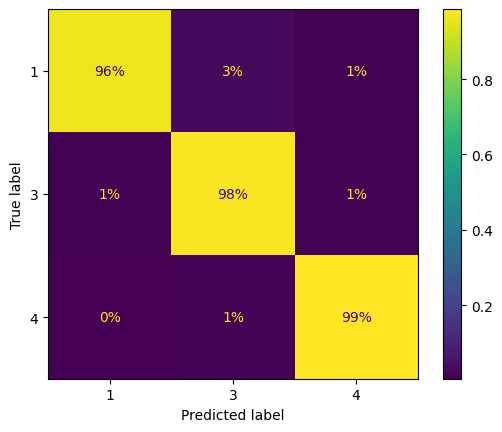

In [86]:
ConfusionMatrixDisplay.from_predictions(Y_test, logistic_pred, normalize="true", values_format=".0%")
plt.show()

**Análisis**


*   **Clase 1:** El modelo alcanza un 96% de precisión en la predicción de la clase 1. Los errores son mínimos; en un 1% de los casos esta clase se confunde con la clase 4, mientras que en un 3% de los casos se clasifica erróneamente como clase 3.
*   **Clase 3:** La clase 3 tiene una precisión del 98%, con un 1% de los casos clasificados incorrectamente como clase 3 y un 1% como clase 4.
*   **Clase 4:** El modelo predice correctamente el 99% de los casos de la clase 4, pero tiene una tasa de error del 1% al confundirlo con la clase 3.

Con esto podemos concluir que el modelo tiene un rendimiento bastante alto para todas las clases, con tasas de predicción correctas que varían entre el 96% y el 99%.


### Precisión y recall

Así mismo, decidimos hacer un reporte para ver la precisión y el f1-score

In [87]:
print(classification_report(Y_test, logistic_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96        98
           3       0.97      0.98      0.97       174
           4       0.99      0.99      0.99       213

    accuracy                           0.98       485
   macro avg       0.98      0.97      0.97       485
weighted avg       0.98      0.98      0.98       485



Con estas métricas podemos concluir que la relación entre la precisión (la proporción de verdaderos positivos sobre el total de predicciones positivas) y el recall (la capacidad del modelo para identificar correctamente todas las instancias de una clase), gracias al f1-score, es un buen indicio de que el modelo está equilibrando.

Junto a al macro y weighted avg podemos concluir que el modelo tiene un rendimiento consistente en todas las clases.

### Cross validation score

También, hicimos hacer un cross valdiation score para ver la consistencia del modelo

In [88]:
cross_val_scores = cross_val_score(logisticRegression, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")

Cross-Validation Scores: [0.9742268  0.97938144 0.96649485 0.97938144 0.96382429]
Mean Cross-Validation Score: 0.9726617650976317


Podemos observar que todos los puntajes están muy cercanos entre sí, con un rango entre 96.38% y 97.93%. Esto sugiere que el modelo es estable/consistente en diferentes subconjuntos de datos y tiene un buen rendimiento constante a lo largo de los pliegues.

### Curva de aprendizaje

Por último, decidimos hacer una curva de aprendizaje del modelo para analizar si está sobreajustado, por lo que está memorizando, o si está aprendiendo.

In [89]:
train_sizes, train_scores, valid_scores = learning_curve(logisticRegression, X_train, Y_train, cv=5)

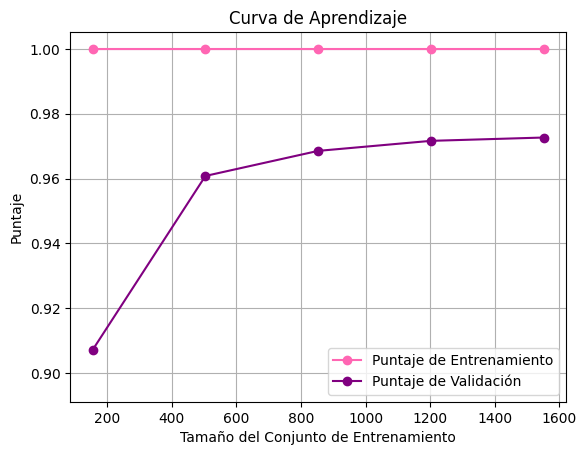

In [90]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff66b3")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff66b3", label="Puntaje de Entrenamiento")

plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="#FFFFFF")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="#800080", label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()

Con esta gráfica podemos analizar que la puntuación en el conjunto de entrenamiento es constante y muy cercana al 100% (1.00). Esto indica que el modelo está ajustando extremadamente bien los datos de entrenamiento, lo que puede ser una señal de sobreajuste. Es decir, el modelo podría estar memorizando los datos de entrenamiento en lugar de aprender patrones generalizables.

###Conclusion

De logistic regression podemos resaltar y concluir:


*   **Exactitud:** 97.73%
*   **Matriz de confusión:** Rendimiento sólido en todas las clases con una nivel de confusión entre clases cercanas y un error máximo del 2%.
*   **Promedio de precisión, recall y f1-score:** 0.97  lo que muestra un buen equilibrio general.
*   **Curva de aprendizaje:** exhibe un sobreajuste: la curva de entrenamiento está cerca del 100%, mientras que la curva de validación es más baja (97%). La diferencia entre las curvas de entrenamiento y validación sugiere que el modelo está memorizando los datos del entrenamiento.

Es un modelo que se puede descartar dado su sobreajuste y la probabilidad de memorización en vez de aprendizaje.





##Modelo 2: RidgeClassifier

Documentado por María Paula Estupiñan

Como segundo enfoque se empleó el modelo Ridge Classifier, el cual se basa en la técnica de regularización Ridge. Este método incorpora un término de penalización en la función de pérdida con el fin de limitar la magnitud de los coeficientes, reduciendo así la varianza del modelo y evitando el sobreajuste. En términos prácticos, el Ridge Classifier separa las clases mediante una función lineal, pero la regularización le permite no ajustarse en exceso a los datos de entrenamiento y, en consecuencia, mejorar su capacidad de generalización.

La elección de este modelo se debe a que maneja de manera más eficiente el ruido y la variabilidad del lenguaje natural, caracterizado por un alto número de características. Gracias a la regularización, el modelo logra centrarse en las palabras realmente relevantes para la clasificación, lo que se traduce en un mejor rendimiento y una mayor precisión, incluso trabajando con los mismos datos que otros clasificadores.

In [91]:
ridgeClassifier.fit(X_train,Y_train)

RidgeClassifier(solver='sparse_cg')

In [92]:
ridge_pred = ridgeClassifier.predict(X_test)
score = accuracy_score(Y_test, ridge_pred)
print("accuracy after evaluation on test data: {0} %".format(score * 100))

accuracy after evaluation on test data: 97.31958762886597 %




### Confusion Matrix

Entrenamos el modelo de logistic regression con los datos de entrenamiento.Luego podemos ver que se calcula una alta exactitud, sin embargo, es necesario medir otros aspectos para determinar la eficiencia del modelo, es por esto que realizaremos una matriz de confusión:

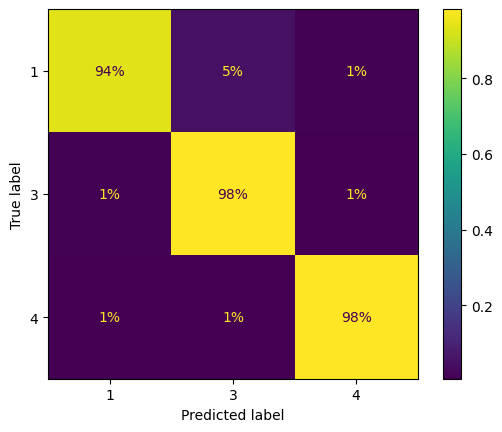

In [93]:
ConfusionMatrixDisplay.from_predictions(Y_test, ridge_pred, normalize="true", values_format=".0%")
plt.show()

**Análisis**


*   **Clase 1:** El modelo alcanza un 94% de precisión en la predicción de la clase 1. Los errores son mínimos; en un 1% de los casos esta clase se confunde con la clase 4, mientras que en un 5% de los casos se clasifica erróneamente como clase 3.
*   **Clase 3:** La clase 3 tiene una precisión del 98%, con un 1% de los casos clasificados incorrectamente como clase 3 y un 1% como clase 4.
*   **Clase 4:** El modelo predice correctamente el 98% de los casos de la clase 4, pero tiene una tasa de error del 1% al confundirlo con la clase 3, y ocurre lo mismo con la clase 1 que de igual manera tiene un 1%.

Con esto podemos concluir que el modelo tiene un rendimiento alto para todas las clases, con tasas de predicción correctas que varían entre el 94% y el 98%.


### Precisión y recall

De igual manera, decidimos hacer el reporte de clasificación para ver la precisión, recall y f1-score

In [94]:
print(classification_report(Y_test, ridge_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95        98
           3       0.96      0.98      0.97       174
           4       0.99      0.98      0.99       213

    accuracy                           0.97       485
   macro avg       0.97      0.97      0.97       485
weighted avg       0.97      0.97      0.97       485



A partir de estos resultados, se puede concluir que el Ridge Classifier obtiene puntuaciones F1 consistentes en todas las clases, mostrando un desempeño comparable al de Logistic Regression en cuanto al equilibrio entre precisión y recall. En general, este modelo demuestra un nivel de exactitud y rendimiento muy similar al del clasificador evaluado previamente, lo que indica que ambos enfoques ofrecen resultados equivalentes en este problema.

### Cross validation score





También, hicimos hacer un cross valdiation score para ver la consistencia del modelo

In [95]:
cross_val_scores = cross_val_score(ridgeClassifier, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")

Cross-Validation Scores: [0.97164948 0.97164948 0.96649485 0.97680412 0.97932817]
Mean Cross-Validation Score: 0.9731852207038013


Podemos observar que todos los puntajes están muy cercanos entre sí, con un rango entre 96.64% y 97.93%. Esto refleja una buena estabilidad del modelo en diferentes subconjuntos de los datos, indicandonos que el modelo es consistente, tiene gran capacidad de generalización y un gran rendimiento.

### Curva de aprendizaje

Por último, decidimos hacer una curva de aprendizaje del modelo para analizar si está sobreajustado, por lo que está memorizando, o si está aprendiendo.

In [96]:
train_sizes, train_scores, valid_scores = learning_curve(ridgeClassifier, X_train, Y_train, cv=5)

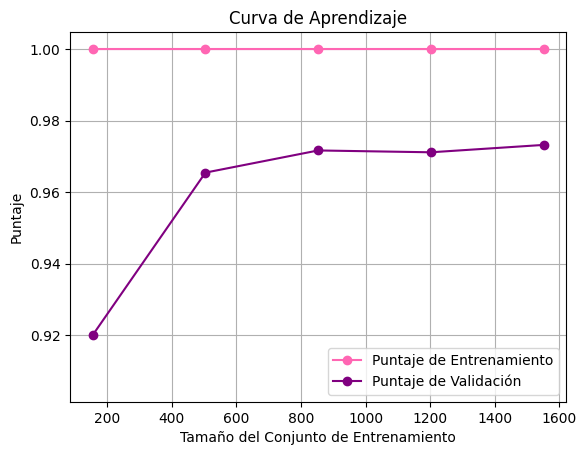

In [97]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff66b3")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff66b3", label="Puntaje de Entrenamiento")

plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="#FFFFFF")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="#800080", label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()

La curva de entrenamiento muestra un rendimiento casi perfecto (muy cerca del 100%) para todo el rango de tamaños de conjunto de entrenamiento.
Esto sugiere que el modelo está sobreajustando los datos de entrenamiento, lo que significa que ajusta demasiado bien los ejemplos de entrenamiento, pero puede no generalizar tan bien a datos nuevos.

###Conclusion

De logistic regression podemos resaltar y concluir:


*   **Exactitud:** 97.31%
*   **Matriz de confusión:** Rendimiento sólido en todas las clases con una nivel de confusión entre clases cercanas y un error máximo del 5%.
*   **Promedio de precisión, recall y f1-score:** 0.97  lo que muestra un buen equilibrio general.
*   **Curva de aprendizaje:** exhibe un sobreajuste: la curva de entrenamiento está cerca del 100%, mientras que la curva de validación es más baja (97%). La diferencia entre las curvas de entrenamiento y validación sugiere que el modelo está memorizando los datos del entrenamiento.

Es un modelo que se puede descartar dado su sobreajuste y la probabilidad de memorización en vez de aprendizaje, además de que podemos evidenciar de que es un modelo menos bueno (aunque en menor proporción) al Logistic Regression.





##Modelo 2: K-NIEGHBORS

Documentado por Laura Valentina Cerón

El algoritmo K-Nearest Neighbors (KNN) clasifica una observación según las clases de sus k vecinos más cercanos en el conjunto de entrenamiento. No construye una función explícita, sino que utiliza una métrica de distancia (como euclidiana o coseno) para medir la similitud. La clase se asigna por mayoría entre los vecinos.

Se eligió este modelo porque es intuitivo y aprovecha la idea de que documentos con palabras similares deberían pertenecer a la misma categoría. Además, el valor de k permite ajustar su complejidad y adaptarlo a distintos patrones en los datos de texto.

In [101]:
kneighbors.fit(X_train,Y_train)

KNeighborsClassifier(metric='cosine')

In [102]:
knei_pred = kneighbors.predict(X_test)
score = accuracy_score(Y_test, knei_pred)
print("accuracy after evaluation on test data: {0} %".format(score * 100))

accuracy after evaluation on test data: 94.02061855670102 %


### Matrix de confusión

La matriz de confusión obtenida para knn permite evaluar qué tan bien el algoritmo clasifica los textos en las diferentes categorías definidas en el proyecto. A continuación se presenta el análisis por clase:

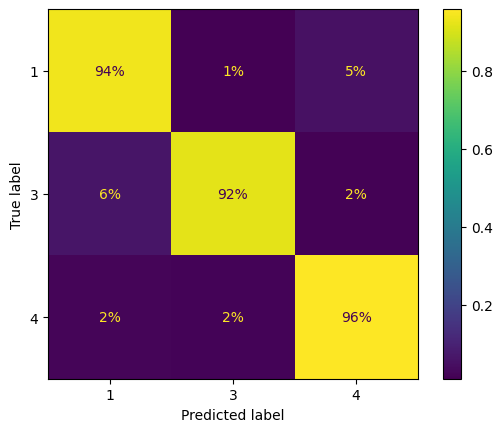

In [107]:
ConfusionMatrixDisplay.from_predictions(Y_test, knei_pred,
                                        normalize="true", values_format=".0%")
plt.show()

**Clase 1**

Se clasificó correctamente en un 94 % de los casos.Un 1 % se confundió con la clase 3 y un 5 % con la clase 4. Aunque la precisión es alta, la confusión con la clase 4 señala que algunos documentos de ambas clases comparten términos similares.

**Clase 3**

Obtuvo un 92 % de acierto. Los errores se distribuyen en un 6 % hacia la clase 1 y un 2 % hacia la clase 4. Este es el grupo con mayor nivel de confusión, lo que sugiere que sus textos se solapan léxicamente con las demás categorías.

**Clase 4**

Alcanzó un 96 % de predicciones correctas.Solo un 2 % se confundió con la clase 1 y otro 2 % con la clase 3. Es la clase con mejor desempeño, lo que indica que presenta patrones de palabras más distintivos.

**Conclusión:**

El modelo KNN logra un desempeño alto, con más del 92 % de aciertos en todas las clases. La mayor confusión ocurre en la clase 3, que se confunde principalmente con la clase 1.

### Precisión y recall

Usaremos el calssification report para complementar la matriz de confusión y evaluar el desempeño del modelo de manera más detallada. Nos permitira analizar tres métricas clave en cada clase: precisión, recall y f1-score, además del accuracy global, lo que da una visión más completa del rendimiento del algoritmo KNN.

In [108]:
print(classification_report(Y_test, knei_pred))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89        98
           3       0.97      0.92      0.94       174
           4       0.96      0.96      0.96       213

    accuracy                           0.94       485
   macro avg       0.93      0.94      0.93       485
weighted avg       0.94      0.94      0.94       485



En los resultados obtenidos, el modelo KNN alcanzó un 94 % de accuracy general, con valores de F1 superiores a 0.89 en todas las clases. La clase 1 presenta un buen recall (0.94) pero menor precisión (0.85), lo que indica cierta confusión con otras clases. La clase 3 mantiene un equilibrio sólido (precisión 0.97, recall 0.92), mientras que la clase 4 es la mejor clasificada con métricas de 0.96 en precisión y recall. En conjunto, los promedios macro y ponderado confirman que el modelo ofrece un rendimiento alto y balanceado en la clasificación de textos.

### Cross validation score

Se aplicó validación cruzada de 5 particiones al modelo KNN para evaluar su rendimiento de forma más confiable y estable.

In [109]:
cross_val_scores = cross_val_score(kneighbors, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (KNN): {cross_val_scores}")
print(f"Mean Cross-Validation Score (KNN): {cross_val_scores.mean():.4f}")

Cross-Validation Scores (KNN): [0.93814433 0.92268041 0.94072165 0.92010309 0.91731266]
Mean Cross-Validation Score (KNN): 0.9278


El modelo alcanzó un promedio de 92.8 % de accuracy, mostrando resultados consistentes en todos los folds y confirmando un buen poder de generalización.

### Curva de aprendizaje

La curva de aprendizaje permite observar cómo evoluciona el rendimiento del modelo KNN a medida que aumenta el tamaño del conjunto de entrenamiento. Con ello se evalúa si el algoritmo mejora con más datos y si existe sobreajuste o subajuste.

In [110]:
train_sizes, train_scores, valid_scores = learning_curve(kneighbors, X_train, Y_train, cv=5)

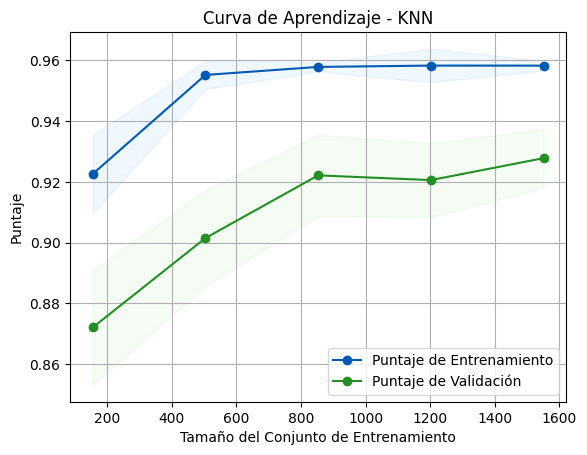

In [111]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje - KNN")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje")
plt.grid()

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="#66b3ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#0059b3",
         label="Puntaje de Entrenamiento")

plt.fill_between(train_sizes,
                 valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std,
                 alpha=0.1, color="#99e699")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="#248f24",
         label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()

El modelo muestra un puntaje de entrenamiento alto y estable (aproximandamente 0.96) y un puntaje de validación en crecimiento ( aproximandamente de 0.93 con más datos). Esto indica que el KNN generaliza bien, mantiene buena precisión y no presenta señales fuertes de sobreajuste.

### Conclusión

**Exactitud:** 94%

**Matriz de confusión:** Clasificación sólida en todas las clases, con más del 92% de aciertos y la mayor confusión localizada entre las clases 1 y 3.

**Promedio de precisión, recall y f1-score:** 0.93–0.94, lo que refleja un rendimiento equilibrado y consistente entre las categorías.

**Curva de aprendizaje:** muestra curvas cercanas y estables; el puntaje de validación crece con más datos y se mantiene alrededor del 93%, indicando buena capacidad de generalización y sin señales fuertes de sobreajuste.

En conclusión, KNN resulta un modelo confiable y robusto para esta tarea de clasificación, con un desempeño alto y estable, aunque ligeramente inferior al de Logistic Regression.

# Conclusiones generales para el negocio

A continuación analizaremos los tres algoritmos con sus respectivos resultados, dado esto daremos conclusiones generales para el negocio y se tomará una decisión.

## Logistic Regression

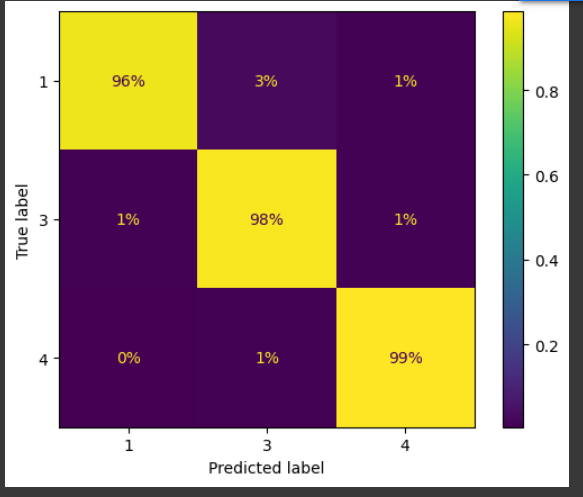

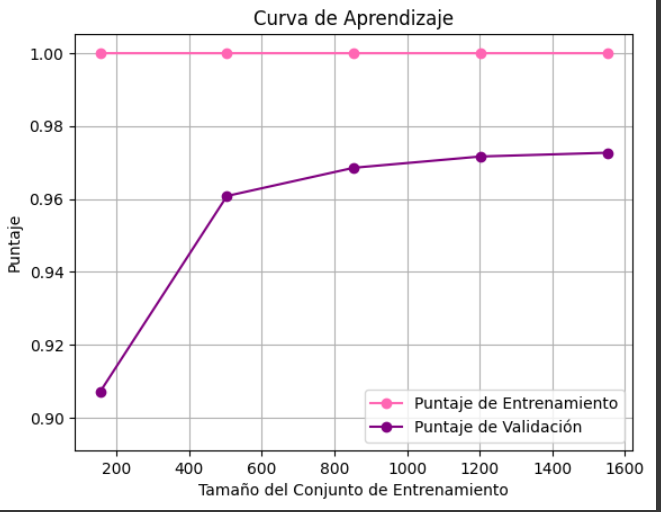

El modelo Logistic Regression demuestra un rendimiento sobresaliente con más del 96% de aciertos en todas las clases y errores mínimos, lo que lo hace muy atractivo para el negocio en términos de precisión y confiabilidad en la clasificación. Sin embargo, la curva de aprendizaje revela un claro sobreajuste, ya que el modelo alcanza casi el 100% en entrenamiento pero un valor menor (97%) en validación. Esto implica que, aunque el modelo funciona muy bien con los datos actuales, puede perder estabilidad al enfrentarse a nuevos escenarios del negocio, limitando su capacidad de generalización y aumentando el riesgo de decisiones basadas en predicciones menos consistentes.

## Ridge Classifier

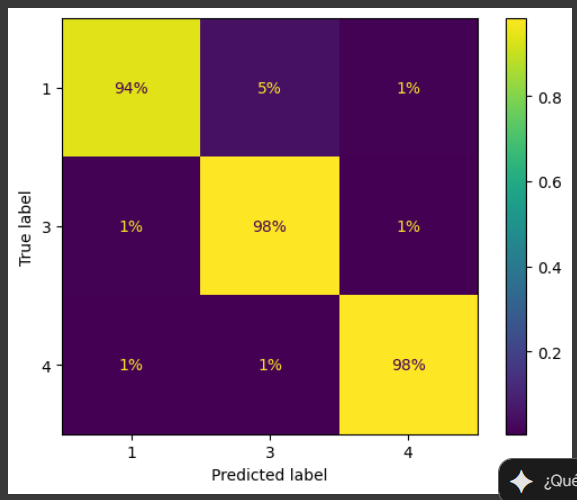

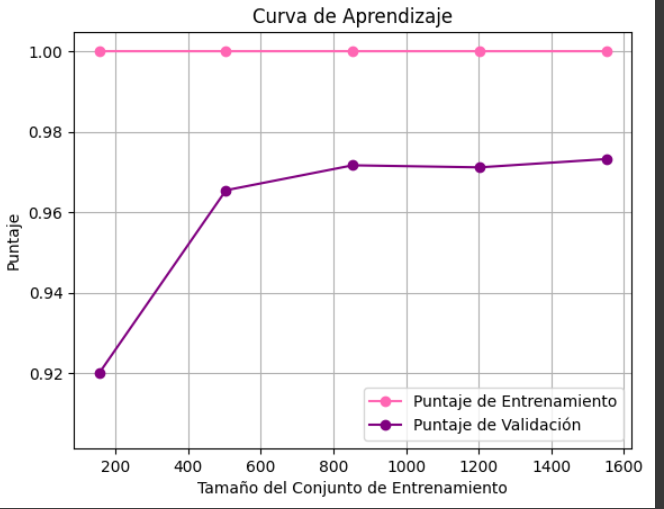

El modelo Ridge Classifier presenta un rendimiento alto y equilibrado, con más del 94% de aciertos en la clase 1 y hasta un 98% en las clases 3 y 4, lo que garantiza un buen nivel de confiabilidad para el negocio al clasificar correctamente la mayoría de los casos, aunque con cierta confusión puntual entre las clases 1 y 3. Sin embargo, la curva de aprendizaje revela un sobreajuste: el puntaje de entrenamiento se mantiene cercano al 100% mientras que el de validación ronda el 97%, mostrando una brecha clara. Esto implica que, aunque el modelo se desempeña muy bien con los datos actuales, puede no mantener la misma precisión en escenarios reales, lo que lo vuelve menos recomendable para el negocio frente a alternativas más estables.

## KNN

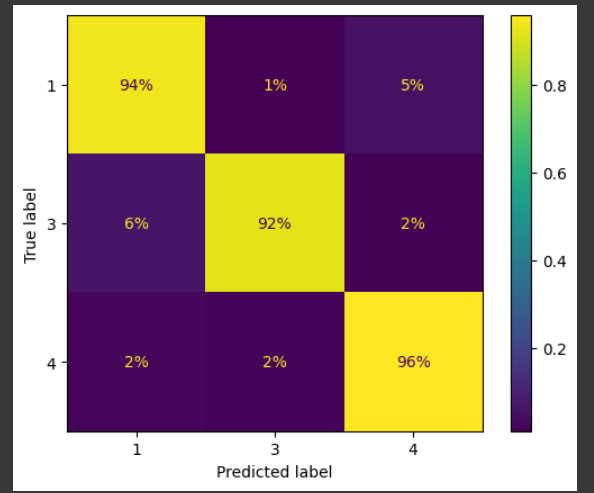

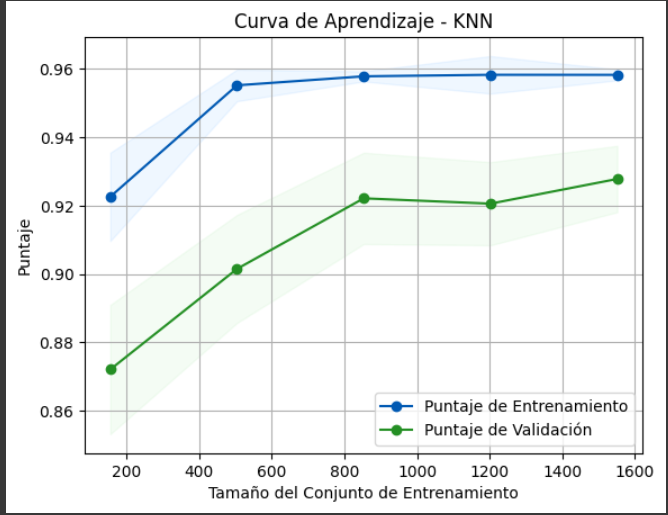

El modelo K-Nearest Neighbors (KNN) logra un desempeño sólido con una exactitud cercana al 94%, mostrando en la matriz de confusión más del 92% de aciertos en todas las clases y errores moderados entre las categorías 1 y 3. La curva de aprendizaje refleja un comportamiento estable y sin señales fuertes de sobreajuste, ya que las curvas de entrenamiento y validación se mantienen cercanas y con tendencia ascendente al aumentar los datos. Para el negocio, esto significa que KNN ofrece un rendimiento confiable y generalizable, siendo capaz de mantener resultados consistentes en escenarios reales y brindando valor práctico en la clasificación de los textos, aunque con una precisión ligeramente inferior a la de los modelos lineales.

# Conclusiones finales

El modelo recomendado para el proyecto es K-Nearest Neighbors (KNN). Aunque su exactitud (94%) es ligeramente menor a la de Logistic Regression y Ridge Classifier, mostró mayor estabilidad y menor riesgo de sobreajuste, lo que garantiza un mejor desempeño con datos reales. Para el negocio, esto significa contar con un modelo capaz de clasificar opiniones ciudadanas de manera confiable y consistente, apoyando la vinculación de estas opiniones con los ODS 1, 3 y 4, y permitiendo que la organización tome decisiones más informadas en la formulación de políticas públicas.

# Roles del proyecto

**Lider de proyecto y de negocio:** Laura Valentina Cerón

**Lider de datos y analítica:** Maria Paula Estupiñan

**Laura (50 puntos):**

Como líder de proyecto, Laura coordinó la organización del trabajo, garantizando que las tareas fueran entregadas en los tiempos establecidos y supervisando el cumplimiento de los objetivos.

Como líder de negocio, se encargó del entendimiento del cliente, de la problemática y la identificación de actores clave. Además, participó en la preparación y limpieza de los datos, y simplificó los resultados para su presentación a personas no técnicas.

Horas: 10 horas
Retos: Coordinación entre áreas, priorización de entregables, apoyo en la calidad de los datos y traducción de resultados técnicos en valor para el negocio.



**Paula (50 puntos)**:

Como líder de datos, Paula fue responsable de la preparación, organización de la información, asegurando la calidad de los insumos para el modelado. También revisó la correcta codificación de los datos y la eliminación de inconsistencias.

Como líder de analítica, se encargó de la evaluación de los modelos basándose en métricas, la comparación de diferentes enfoques y la elección del más óptimo. Asimismo, analizó posibles sesgos y sobreajuste para garantizar un modelo robusto y aplicable.

Horas: 10 horas
Retos: Corrección de problemas de codificación, elección de las métricas más adecuadas y balance entre precisión y generalización.